# Introduction
Consider the following Neural Network,

<img src = "../artifacts/neural_networks_36.png" alt = "drawing" width = "500">

The computation graph for the above looks as follows,

<img src = "../artifacts/neural_networks_37.png" alt = "drawing" width = "500">

# Forward Propagation
In forward propagation, the propagation is from left to right. The following is done during a forward pass (forward propagation),
- Calculate the value of $z_i$.
- Apply activation function on top of it.
- Then pass it to the Neuron in front of it.
- Ultimately, the probabilities are obtained.
- Then these probabilities are used to calculate the loss. Since it is multi-class classification problem, the loss function used is categorical cross entropy.

The final objective is to compute $z^2$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spiral.csv")
df.head()

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


In [3]:
# separating features and labels
x = df.drop(columns = ["y"])
y = df["y"]
x.shape, y.shape

((300, 2), (300,))

In [4]:
# initialize the parameters at random
d = 2 # dimensions or number of inputs
n = 3 # number of classes or number of neurons in the output layer
h = 4 # number of neurons in the hidden layer

In [5]:
# input layer to the hidden layer
# weight and bias of layer 1
w1 = 0.01 * np.random.randn(d, h)
b1 = np.zeros((1, h))
w1.shape, b1.shape

((2, 4), (1, 4))

### Calculating $z^1$
Each row of $x$ is multiplied with each column of $w_1$ and bias is added to the result of this.

In [6]:
# z1 = np.dot(x, w) + b
z1 = np.dot(x, w1) + b1
z1.shape

(300, 4)

### Calculating $a^1$
The ReLU function is applied to $z^1$.

In [7]:
# ReLU activation function
a1 = np.maximum(0, z1)
a1.shape

(300, 4)

In [8]:
# hidden layer to the output layer
# weight and bias of layer 2
w2 = 0.01 * np.random.randn(h, n)
b2 = np.zeros((1, n))
w2.shape, b2.shape

((4, 3), (1, 3))

### Calculating $z^2$
In order to calculate $z^2$, $a^1$ is multiplied with $w_2$ and the bias $b^2$ is added to the result.

In [9]:
z2 = np.dot(a1, w2) + b2
z2.shape

(300, 3)

### Calculating $a^2$

In [10]:
# apply the softmax function to compute a2
z2_exp = np.exp(z2)
a2 = z2_exp/ np.sum(z2_exp, axis = 1, keepdims = True)
probs = a2
probs.shape

(300, 3)

<img src = "../artifacts/neural_networks_38.png" alt = "drawing" width = "500">

# Loss Calculation
### Will the loss function change?
No.

# Backward Propagation
### Will the gradient calculation change in case of n layer Neural Network?
No. But, there is an additional requirement to back propagate the gradients for one additional layer.

In [11]:
# number of data points (training samples)
m = y.shape[0]
m

300

### Calculating $dz^2$

<img src = "../artifacts/neural_networks_39.png" alt = "drawing" width = "500">

$dz^2 = \frac{\partial L}{\partial z^2}$

So,

$\frac{\partial L}{\partial z^2} = \frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^2}$

Here, $a^2$ is the output probabilities.

Replace $a^2$ with $p$, $\frac{\partial L}{\partial z^2} = \frac{\partial L}{\partial p} * \frac{\partial p}{\partial z^2}$

The above equation is similar to what was calculated previously, i.e., derivative of loss with respect to $z$.

$dz = \frac{\partial J}{\partial p} * \frac{\partial p}{\partial z}$.

The derivative came out to be, $dz = (p_i - I(i = y))$

Hence, $dz^2 = (p_i - I(i = y))$.

In [12]:
dz2 = probs
dz2[range(m), y] -= 1

The shape of $dz^2$ is the same as the shape of probabilities, `(m, n)` (i.e., in this case `(300, 3)`).

### Calculating $dw^2$ and $db^2$
Gradient calculation for $dw^2$ and $db^2$ will also be similar to $dw$ and $db$ as it was in the softmax classifier.

<img src = "../artifacts/neural_networks_40.png" alt = "drawing" width = "500">

$dw^2 = \frac{\partial L}{\partial w^2} = \frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^2} * \frac{\partial z^2}{\partial w^2}$.

$dw^2 = dz^2 * \frac{\partial z^2}{\partial w^2}$.

Here, $z^2 = w^{2^T} * a^1 + b^2$.

So, $\frac{\partial z^2}{\partial w^2} = a^1$

$dw^2 = \frac{\partial L}{\partial w^2} = dz^2 * a^1$

The shape of $dz^2$ = `(300, 3)` and the shape of $a^1$ = `(300, 4)`.

$dw^2$ will be used to update $w^2$. Therefore, the shape of $dw^2$ should be same as $w^2$, i.e., `(4, 3)`.

Hence, $dz^2$ and $a^1$ should be multiplied such that, the resulting matrix has the shape `(4, 3)`.

Therefore, the transpose of $a^1$ is multiplied with $dz^2$, $a^{1^T} * dz^2$.

<img src = "../artifacts/neural_networks_41.png" alt = "drawing" width = "500">

In [13]:
dw2 = np.dot(a1.T, dz2)/ m
dw2.shape

(4, 3)

The division by `m` is because, in Gradient Descent, since all the data points are used for calculating the updated $w$, the average is taken by dividing the total number of data points.

<img src = "../artifacts/neural_networks_42.png" alt = "drawing" width = "500">

Why is there a need to divide by m? The goal is to update weights and biases, it can be done by,
1. calculating the derivatives $dw^2$, $db^2$, $dw^1$, $db^1$.
2. Updating the weights, $w^1 = w^1 - \eta * dw^1 *\frac{1}{m}$.

$db^2$ can also be calculated in a similar way.

<img src = "../artifacts/neural_networks_43.png" alt = "drawing" width = "500">

$db^2 = \frac{\partial L}{\partial b^2} = \frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^2} * \frac{\partial z^2}{\partial b^2}$

Now, $\frac{\partial z^2}{\partial b^2} = \frac{\partial (w^2 * a^1 + b^2)}{db^2} = 1$.

$db^2 = \frac{\partial L}{\partial b^2} = \frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^2} * 1 = dz^2$.

$db^2$ will be used to update $b^2$. Therefore, the shape of $db^2$ will be same as $b^2$, i.e., `(1, 3)`.

But the shape of $dz^2$ is `(300, 3)`. Since gradient descent and not stochastic gradient descent is being performed, the derivatives have to summed up across the rows and then average of them has to taken before using it for the updating.

<img src = "../artifacts/neural_networks_44.png" alt = "drawing" width = "500">

In [14]:
db2 = np.sum(dz2, axis = 0, keepdims = True)/ m
db2.shape

(1, 3)

### Calculating $da^1$
<img src = "../artifacts/neural_networks_45.png" alt = "drawing" width = "500">

$da^1 = \frac{\partial L}{\partial a^1} = \frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^1} * \frac{\partial z^2}{\partial a^1}$

Since, $\frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^2} = sz^2$.

Now,

$\frac{\partial z^2}{\partial a^1} = \frac{\partial (w^2 * a^1 + b^2)}{da^1} = w^2$.

$da^1 = \frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^2} * w^2 = dz^2 * w^2$.

The shape of $da^1$ will be same as $a^1$, i.e., `(300, 4)`.

<img src = "../artifacts/neural_networks_46.png" alt = "drawing" width = "500">

The shape of $dz^2$ = `(300, 3)` and the shape of $w^2$ = `(4, 3)`

$dw^2$ will be used to update $w^2$. Therefore, the shape of $dw^2$ should be same as $w^2$, i.e., `(4, 3)`.

Hence, $dz^2$ and $w^2$ should be multiplied such that, the resulting matrix has the shape `(4, 3)`.

Therefore, the transpose of $w^2$ is multiplied with $dz^2$, $da^1 = w^{2^T} * dz^2$.

In [15]:
da1 = np.dot(dz2, w2.T)
da1.shape

(300, 4)

### Calculating $dz^1$
To calculate the gradient of $dz^1$, the ReLU layer has to to passed backwards.

<img src = "../artifacts/neural_networks_47.png" alt = "drawing" width = "500">

$\frac{\partial L}{\partial z^1} = \frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^2} * \frac{\partial z^2}{\partial a^1} * \frac{\partial a^1}{\partial z^1}$

It is known that, $\frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^2} * \frac{\partial z^2}{\partial a^1} = da^1$

$\frac{\partial a^1}{\partial z^1}$ has to be calculated.

<img src = "../artifacts/neural_networks_48.png" alt = "drawing" width = "500">

<img src = "../artifacts/neural_networks_49.png" alt = "drawing" width = "500">

In [16]:
da1[z1 <= 0] = 0
dz1 = da1
dz1.shape

(300, 4)

Why is $da^1$ being directly updated without creating a copy of it?
- The purpose of calculating $da^1$ and $dz^1$ is to ultimately calculate $dw^1$ and $db^1$. Both of them are being used for intermediatory purpose.
- Therefore, making changes in $da^1$ will not change anything as $dz^1$ is already calculated.
- And $da^1$ will not be used anywhere else expect for calculation of $dz^1$.

This also means that the intermediate output values from the forward pass have to be saved.

### Calculating $dw^1$ and $db^1$

<img src = "../artifacts/neural_networks_50.png" alt = "drawing" width = "500">

<img src = "../artifacts/neural_networks_51.png" alt = "drawing" width = "500">

$\frac{\partial L}{\partial w^1} = \frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^2} * \frac{\partial z^2}{\partial a^1} * \frac{\partial a^1}{\partial z^1} * \frac{\partial z^1}{\partial w^1}$.

It is known that, $\frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^2} * \frac{\partial z^2}{\partial a^1} * \frac{\partial a^1}{\partial z^1} = dz^1$.

$\frac{\partial z^1}{\partial w^1}$ has to be calculated.

$\frac{\partial z^1}{\partial w^1} = \frac{\partial (w^1 * x + b^1)}{\partial w^1} = x$

$\frac{\partial L}{\partial w^1} = dz^1 * x$.

$db^1$ can similarly be calculated as,

<img src = "../artifacts/neural_networks_52.png" alt = "drawing" width = "500">

$\frac{\partial L}{\partial b^1} = \frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^2} * \frac{\partial z^2}{\partial a^1} * \frac{\partial a^1}{\partial z^1} * \frac{\partial z^1}{\partial b^1}$.

It is known that, $\frac{\partial L}{\partial a^2} * \frac{\partial a^2}{\partial z^2} * \frac{\partial z^2}{\partial a^1} * \frac{\partial a^1}{\partial z^1} = dz^1$.

$\frac{\partial z^1}{\partial b^1}$ has to be calculated.

$\frac{\partial z^1}{\partial b^1} = \frac{\partial (w^1 * x + b^1)}{\partial b^1} = 1$

Therefore, $\frac{\partial L}{\partial b^1} = dz^1 * 1$.

In [17]:
dw1 = np.dot(x.T, dz1)/ m
db1 = np.sum(dz1, axis = 0, keepdims = True)/ m
dw1.shape, db1.shape

((2, 4), (1, 4))

Now that the gradients have been found, the weights and biases can be updated as,

In [18]:
lr = 1e-0

In [19]:
# update the parameters
w1 += -lr * dw1
b1 += -lr * db1
w2 += -lr * dw2
b2 += -lr * db2
w1, b1, w2, b2

(array([[-0.00855689,  0.00430017,  0.01279042, -0.01075988],
        [ 0.01212138, -0.02909454, -0.00537403, -0.0030652 ]]),
 array([[-4.38643419e-05, -1.47479355e-03,  9.78860633e-04,
          4.53219652e-04]]),
 array([[-0.00848596, -0.00395906,  0.00449222],
        [ 0.00061844,  0.01346557,  0.00241135],
        [ 0.00894102, -0.00114459, -0.01013172],
        [ 0.00462715, -0.00038039,  0.01188394]]),
 array([[ 8.92514969e-06, -1.12368968e-05,  2.31174715e-06]]))

The parameters are updated until the convergence takes place (error goes down).

### Summary of the entire process
A single gradient descent for weight update looks as follows,

<img src = "../artifacts/neural_networks_53.png" alt = "drawing" width = 500>

The derivatives are as follows,

<img src = "../artifacts/neural_networks_54.png" alt = "drawing" width = 500>

Notice that,
- $dz^2$ is used for the calculation of $dw^2$, $db^2$ and $da^1$.
- Similarly, $da^1$ is used for the calculation of $dz^1$.
- And, $dz^1$ is used used for the calculation of $dw^1$ and $db^1$.

In order to not calculate the values of deeper derivatives, i.e., $da^1$, $dz^1$ over and over again, the derivatives of deeper layers are calculated and stored. The stored values can be used to calculate the derivative of the shallow layers. This is called memoization, it is also used in dynamic programming.

The following is the simplified flowchart of single cycle of updation,

<img src = "../artifacts/neural_networks_55.png" alt = "drawing" width = 500>

During forward propagation,
- The values of $z^j$, $w^j$, $b^j$ in order to use them during back propagation.
- For example, $da^1$ used $w^2$ for its calculation.

### Consolidated code

In [20]:
df = pd.read_csv("spiral.csv")

# separating features and labels
x = df.drop(columns = ["y"])
y = df["y"]

# randomly initialize parameters
d = 2
n = 3
h = 4 # size of the hidden layer
w1 = 0.01 * np.random.randn(d, h)
b1 = np.zeros((1, h))
w2 = 0.01 * np.random.randn(h, n)
b2 = np.zeros((1, n))

# hyperparameters
lr = 1e-0
reg = 1e-3 # regularization strength
num_examples = x.shape[0]

for i in range(10000):

    # forward propagation
    z1 = np.dot(x, w1) + b1
    a1 = np.maximum(0, z1)
    z2 = np.dot(a1, w2) + b2
    z2_exp = np.exp(z2)
    a2 = z2_exp/ np.sum(z2_exp, axis = 1, keepdims = True)
    probs = a2

    # calculate loss
    correct_logprobs = np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)/ num_examples
    reg_loss = 0.5 * reg * np.sum(w1 * w1) + 0.5 * reg * np.sum(w2 * w2) # regularization
    loss = data_loss + reg_loss # adding regularization to loss
    if i % 1000 == 0:
        print(f"Iteration = {i}, Loss = {loss}")

    # backward propagation
    # compute the gradient on scores
    dz2 = probs
    dz2[range(num_examples), y] -= 1
    dz2 /= num_examples

    # first back prop into parameters w2 and b2
    dw2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis = 0, keepdims = True)
    # next backprop into hidden layer a1
    da1 = np.dot(dz2, w2.T)
    # back prop the ReLU non-linearity
    da1[z1 <= 0] = 0
    # finally into w and b
    dz1 = da1
    dw1 = np.dot(x.T, dz1)
    db1 = np.sum(dz1, axis = 0, keepdims = True)

    # add regularization gradient contribution
    dw2 += reg * w2
    dw1 += reg * w1

    # update the parameters
    w1 += -lr * dw1
    b1 += -lr * db1
    w2 += -lr * dw2
    b2 += -lr * db2

Iteration = 0, Loss = -1.098593567394952
Iteration = 1000, Loss = -0.6981198499105846
Iteration = 2000, Loss = -0.7087324682684372
Iteration = 3000, Loss = -0.7195255090352034
Iteration = 4000, Loss = -0.6845686421376971
Iteration = 5000, Loss = -0.6922983956192361
Iteration = 6000, Loss = -0.6906546200056994
Iteration = 7000, Loss = -0.7305246281941238
Iteration = 8000, Loss = -0.6899064250492372
Iteration = 9000, Loss = -0.708630118702977


### All code wrapped in a class

In [21]:
class NN:

    def __init__(self, n_features, n_hidden, n_classes):
        self.d = n_features
        self.h = n_hidden
        self.n = n_classes
        self.W1 = 0.01 * np.random.randn(self.d, self.h)
        self.b1 = np.zeros((1,self.h))
        self.W2 = 0.01 * np.random.randn(self.h,self.n)
        self.b2 = np.zeros((1,self.n))

    def fwd_prop(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = np.maximum(0, Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        Z2 = np.exp(Z2)
        A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
        return A1, A2

    def cce_loss(self, y, probs):
        num_examples = y.shape[0]
        correct_logprobs = -np.log(probs[range(num_examples),y])
        loss = np.sum(correct_logprobs)/num_examples
        return loss

    def back_prop(self, X, A1, A2, y):
        # compute the gradient on scores
        num_examples = y.shape[0]
        dZ2 = A2
        dZ2[range(num_examples),y] -= 1
        dZ2 /= num_examples
        # first backprop into parameters W2 and b2
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        # next backprop into hidden layer, A1
        dA1 = np.dot(dZ2, self.W2.T)
        # backprop the ReLU non-linearity
        dA1[A1 <= 0] = 0
        # finally into W,b
        dZ1 = dA1
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        return dW1, db1, dW2, db2

    def fit(self, X, lr, reg, max_iters):
        num_examples = X.shape[0]
        for i in range(max_iters):
            #foward prop
            A1, A2 = self.fwd_prop(X)
            # calculate loss
            data_loss = self.cce_loss(y, A2)
            reg_loss = 0.5*reg*np.sum(self.W1*self.W1) + 0.5*reg*np.sum(self.W2*self.W2)
            loss = data_loss + reg_loss

            if i % 1000 == 0:
                print("iteration %d: loss %f" % (i, loss))

            dW1, db1, dW2, db2  = self.back_prop(X, A1, A2, y)

            # add regularization gradient contribution
            dW2 += reg * self.W2
            dW1 += reg * self.W1

            # perform a parameter update
            self.W1 += -lr * dW1
            self.b1 += -lr * db1
            self.W2 += -lr * dW2
            self.b2 += -lr * db2

    def predict(self, X):
        A1 = np.maximum(0, np.dot(X, self.W1) + self.b1) # ReLU(Z1) = ReLU(W1T. X + b1)
        Z2 = np.dot(A1, self.W2) + self.b2 # Z2 = W2T.A1 + b2 => 3 probab
        y_hat = np.argmax(Z2, axis=1) # taking index of max probab
        return y_hat

In [22]:
# from matplotlib import pyplot as plt
# # create a 2D grid
# step = 0.02
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# # predict for all the points in the grid

# y_hat = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
# y_hat = y_hat.reshape(xx.shape)

# # plot
# fig = plt.figure()
# plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.show()

# `sklearn` Implementation of Neural Network
Each unit of Neural Network is also called as Perceptron, and Neural Network as a whole is called Multi-Layer Perceptron.

Documentation of `sklearn` MLP classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html.

In [23]:
df = pd.read_csv("spiral.csv")

# separating features and labels
x = df.drop(columns = ["y"])
y = df["y"]

In [25]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    solver = "lbfgs",
    alpha = 1e-5,
    hidden_layer_sizes = (100),
    random_state = 100,
    activation = "relu",
    max_iter = 200
)
mlp.fit(x, y)
print(mlp.score(x, y))

0.9933333333333333


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [26]:
len(mlp.coefs_)

2

In [27]:
len(mlp.intercepts_)

2

In [28]:
mlp.loss_

np.float64(0.012053740037746936)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


(-1.8585153350667682, 1.901484664933235)

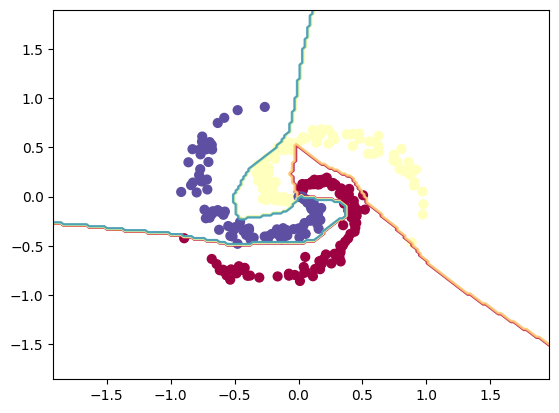

In [29]:
# create a 2D grid
step = 0.02
x_min = x["x1"].min() - 1 # obtain the minimum value from the first column
x_max = x["x1"].max() + 1 # obtain the maximum value from the first column
y_min = x["x2"].min() - 1 # obtain the minimum value from the second column
y_max = x["x2"].max() + 1 # obtain the maximum value from the second column
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict all the points in the grid
# concatenates along the second axis
y_pred = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contour(xx, yy, y_pred, cmap = plt.cm.Spectral, alpha = 0.8)
plt.scatter(x["x1"], x["x2"], c = y, s = 40, cmap = plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Neural Networks For Regression

<img src = "../artifacts/neural_networks_56.png" alt = "drawing" width = "500">

If the last neuron in chain is,
- Linear: The Neural Network will perform regression (e.g., $y = x$).
- Probabilistic: The Neural Network will perform classification (e.g., $y = \sigma(x)$).

### Should the activation functions in intermediate layers be linear too?
No. If all layers in a Neural Network had linear activation function, then the Neural Network would not be able to create higher order complex features. 

Also, the entire Network would collapse into a single layer, no matter how deep it is. This is because the composition of linear functions is still a linear function.

Therefore, the activation functions in the intermediate layers should always be non-linear.